In [36]:
# Importing Libraries

import torch
import numpy as np
import matplotlib.pyplot as plt

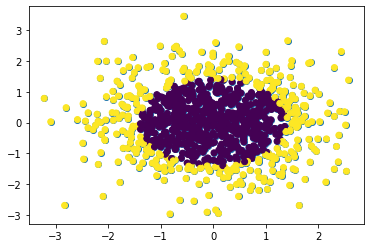

In [37]:
# Dataset of length 1000 and dimension 2 creation using torch normal distribution

X = torch.normal(0, 1, (1000, 2))
plt.scatter(X[:, 0], X[:, 1])

# Adding a bias term to the dataset
X = torch.cat((X, torch.ones(1000, 1)), 1)
# print(X)

# Creating a target vector y of length 1000
Y = torch.zeros(1000, 1)
for i in range(1000):
    if X[i, 0]**2 + X[i, 1]**2 > 2:
        Y[i, 0] = 1
    else:
        Y[i, 0] = 0
plt.scatter(X[:, 0], X[:, 1], c=Y[:, 0])


In [38]:
# weight matrix of size 3x4

W1 = torch.randn(3,4,requires_grad=True)
W2 = torch.randn(4,1,requires_grad=True)

In [39]:
def ReLU(x):
    return torch.max(x,torch.zeros_like(x))

def sigmoid(x):
    return 1/(1+torch.exp(-x))

def ReLU_grad(X):
    X[X>0] = 1
    X[X<=0] = 0
    return X

In [40]:
# Defining MLP forward pass

def forward(X,W1,W2):
    X = torch.matmul(X,W1)
    X = ReLU(X)
    X = torch.matmul(X,W2)
    X = sigmoid(X)
    return X

In [44]:
def loss_a(X,Y,W):
    return torch.mean((forward(X,W1,W2) - Y)**4)

In [45]:
# Defining MLP back Propagation using defined functions for loss and gradient

def backprop(X,Y,W1,W2, lr):
    W2 = W2 - lr*torch.matmul(torch.transpose(ReLU(torch.matmul(X,W1)),0,1),4*(forward(X,W1,W2)-Y)**3*forward(X,W1,W2))
    W1 = W1 - lr*torch.matmul(torch.transpose(X,0,1),torch.matmul(4*(forward(X,W1,W2)-Y)**3*forward(X,W1,W2),torch.transpose(W2,0,1))*ReLU_grad(torch.matmul(X,W1)))
    return W1,W2

In [46]:
num_epochs = 1000

for i in range(num_epochs):
    W1,W2 = backprop(X,Y,W1,W2, lr=0.001)
    if i%100 == 0:
        print(loss_a(X,Y,W2))

# calculating accuracy
acc = 0
a = forward(X,W1,W2)
for i in range(1000):
    if a[i]>0.5:
        a[i] = 1
    else:
        a[i] = 0
    if a[i] == Y[i]:
        acc += 1

print(acc/1000)

tensor(0.0099, grad_fn=<MeanBackward0>)
tensor(0.0094, grad_fn=<MeanBackward0>)
tensor(0.0091, grad_fn=<MeanBackward0>)
tensor(0.0090, grad_fn=<MeanBackward0>)
tensor(0.0089, grad_fn=<MeanBackward0>)
tensor(0.0088, grad_fn=<MeanBackward0>)
tensor(0.0087, grad_fn=<MeanBackward0>)
tensor(0.0086, grad_fn=<MeanBackward0>)
tensor(0.0086, grad_fn=<MeanBackward0>)
tensor(0.0085, grad_fn=<MeanBackward0>)
0.924
